# Chapter 5

In [64]:
# Data prep
import pandas as pd
from urllib.request import urlretrieve
url = 'https://assets.datacamp.com/production/course_2023/datasets/gapminder.csv'
urlretrieve(url, 'gapminder.csv')
gapminder = pd.read_csv('gapminder.csv')
g1800s = gapminder.iloc[0:258,:]
print(g1800s.iloc[0:1,:])
g1900s = gapminder.iloc[258:518,:]
print(g1900s.iloc[0:1,:])
g2000s = gapminder.iloc[518:,:]
print(g2000s.iloc[0:1,:])

   Unnamed: 0  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        ...         2008  2009  2010  2011  2012  2013  2014  2015  2016  \
0       ...          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   Life expectancy  
0         Abkhazia  

[1 rows x 219 columns]
     Unnamed: 0  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
258         258   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

          ...         2008  2009  2010  2011  2012  2013  2014  2015  2016  \
258       ...          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     Life expectancy  
258            Åland  

[1 rows x 219 columns]
     Unnamed: 0  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
518         258   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

          ...         2008  2009  2010  2011  2012  2013  2014  2015  2016  \
518       ...          NaN   NaN   NaN 

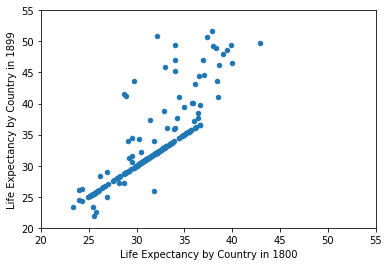

In [65]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

In [66]:
# data prep
g1800s.iloc[:,0] = g1800s.iloc[:,-1]
g1800s = g1800s.iloc[:,:-2]
g1800s.columns.values[0] = 'Life expectancy'
print(g1800s)
print(g1800s.columns[0])

              Life expectancy   1800   1801   1802   1803   1804   1805  \
0                    Abkhazia    NaN    NaN    NaN    NaN    NaN    NaN   
1                 Afghanistan  28.21  28.20  28.19  28.18  28.17  28.16   
2       Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN   
3                     Albania  35.40  35.40  35.40  35.40  35.40  35.40   
4                     Algeria  28.82  28.82  28.82  28.82  28.82  28.82   
5              American Samoa    NaN    NaN    NaN    NaN    NaN    NaN   
6                     Andorra    NaN    NaN    NaN    NaN    NaN    NaN   
7                      Angola  26.98  26.98  26.98  26.98  26.98  26.98   
8                    Anguilla    NaN    NaN    NaN    NaN    NaN    NaN   
9         Antigua and Barbuda  33.54  33.54  33.54  33.54  33.54  33.54   
10                  Argentina  33.20  33.20  33.20  33.20  33.20  33.20   
11                    Armenia  34.00  34.00  34.00  34.00  34.00  34.00   
12                      A

/Users/Brian/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [67]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


In [50]:
g1800s['Life expectancy'].value_counts()[0]

1

In [68]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s])

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


(780, 218)
    1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN        

In [53]:
gapminder.shape

(780, 218)

In [69]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [70]:
# prep
import numpy as np
gapminder_old = gapminder
gapminder = gapminder_melt

# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

In [71]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169260 entries, 0 to 169259
Data columns (total 3 columns):
country            169260 non-null object
year               169260 non-null int64
life_expectancy    43857 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB


In [72]:
# Create the series of countries: countries
countries = gapminder.country

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries[mask_inverse]

# Print invalid_countries
print(invalid_countries)


49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


In [73]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna()

# Print the shape of gapminder
print(gapminder.shape)


(43857, 3)


/Users/Brian/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


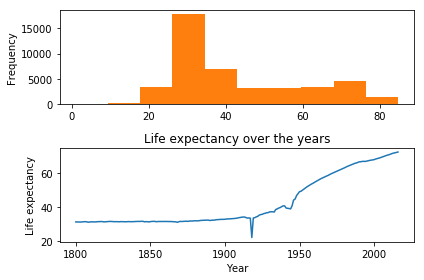

In [75]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder_clean.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
